**Cloning the repository**

In [1]:
!git clone https://github.com/m7mdemad/Binary-Classification

Cloning into 'Binary-Classification'...
remote: Enumerating objects: 22, done.
remote: Counting objects: 100% (22/22), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 22 (delta 2), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (22/22), done.


**1- Load the training dataset**

In [ ]:
# import pandas as pd
# data = pd.read_csv('Binary-Classification/dataset/training.csv')
# data

**The data is not structured well.**
So it will need to be modified to be able to start building the model

problems:
  - data is seen as one column
  - types aren't detected 
  - variables segmentation is wrong

In [39]:
import pandas as pd

def restructure_and_load_data(src='Binary-Classification/dataset/training.csv'):
  #  Read the dataset as txt file
  with open(src) as f:
      content = f.readlines()
  data_file = [x.strip() for x in content] 

  # To make types recognizable
  for i in range(len(data_file)):
    data_file[i] = data_file[i].replace('"', '')
    data_file[i] = data_file[i].replace('.', '')
    data_file[i] = data_file[i].replace(',', '.')

  #  overwrite the results
  with open(src, 'w') as filehandle:
      for listitem in data_file:
          filehandle.write('%s\n' % listitem)

  data = pd.read_csv(src, sep=";")
  data.rename(columns={'variable17':'variable16'}, 
                  inplace=True)
  data.rename(columns={'variable18':'variable17'}, 
                  inplace=True)
  data.rename(columns={'variable19':'variable18'}, 
                  inplace=True)
  return data

data = restructure_and_load_data()

**2- Data discovery**

In [40]:
# Data overview
print('---------------------- describe ------------------------')
print(data.describe())
print('------------------------ dtypes ------------------------')
print(data.dtypes)
# See if there is NaN cells
print('------------------------ NaN ------------------------')
print(data.isnull().sum())
# Most of NaNs is coming from this column, most likely will be deleted
print('---------------------- Variable17 ------------------------')
print(data['variable17'].describe())


---------------------- describe ------------------------
         variable2     variable3  ...    variable16   variable18
count  3661.000000   3700.000000  ...  3.600000e+03  3700.000000
mean   2698.231631   1210.569655  ...  1.626950e+06     0.925405
std    1690.388911   3163.834623  ...  1.560457e+06     0.262772
min      16.000000      0.000000  ...  0.000000e+00     0.000000
25%    1917.000000      0.000830  ...  0.000000e+00     1.000000
50%    2558.000000     55.000000  ...  1.200000e+06     1.000000
75%    3667.000000    452.250000  ...  2.800000e+06     1.000000
max    8025.000000  26335.000000  ...  1.160000e+07     1.000000

[8 rows x 8 columns]
------------------------ dtypes ------------------------
variable1      object
variable2     float64
variable3     float64
variable4      object
variable5      object
variable6      object
variable7      object
variable8       int64
variable9      object
variable10     object
variable11      int64
variable12     object
variable13     

Exploring the categorical variables

In [41]:
 print('------------------ Variable1 ------------------------')
print(data["variable1"].value_counts())
print('------------------ Variable4 ------------------------')
print(data["variable4"].value_counts())
print('------------------ Variable5 ------------------------')
print(data["variable5"].value_counts())
print('------------------ Variable6 ------------------------')
print(data["variable6"].value_counts())
print('------------------ Variable7 ------------------------')
print(data["variable7"].value_counts())
print('------------------ Variable9 ------------------------')
print(data["variable9"].value_counts())
print('------------------ Variable10 ------------------------')
print(data["variable10"].value_counts())
print('------------------ Variable12 ------------------------')
print(data["variable12"].value_counts())
print('------------------ Variable13 ------------------------')
print(data["variable13"].value_counts())
print('------------------ Variable17 ------------------------')
print(data["variable17"].value_counts())
print('------------------ classLabel ------------------------')
print(data["classLabel"].value_counts())


------------------ Variable1 ------------------------
b    2382
a    1279
Name: variable1, dtype: int64
------------------ Variable4 ------------------------
u    3055
y     549
l      32
Name: variable4, dtype: int64
------------------ Variable5 ------------------------
g     3055
p      549
gg      32
Name: variable5, dtype: int64
------------------ Variable6 ------------------------
c     787
q     612
W     363
cc    343
x     340
aa    210
i     191
m     179
k     170
e     137
ff    136
d      94
j      39
r      33
Name: variable6, dtype: int64
------------------ Variable7 ------------------------
v     2015
h      970
bb     339
ff     154
z       49
j       37
n       33
dd      20
o       17
Name: variable7, dtype: int64
------------------ Variable9 ------------------------
t    3171
f     529
Name: variable9, dtype: int64
------------------ Variable10 ------------------------
t    2239
f    1461
Name: variable10, dtype: int64
------------------ Variable12 ------------------

In [42]:
# Compare data of variable4 and variable5
print(data["variable4"].value_counts())

temp1 = data.loc[data['variable4'] == 'u']
print(temp1["variable5"].value_counts())

temp2 = data.loc[data['variable4'] == 'y']
print(temp2["variable5"].value_counts())

temp3 = data.loc[data['variable4'] == 'l']
print(temp3["variable5"].value_counts())

# They are identical 

u    3055
y     549
l      32
Name: variable4, dtype: int64
g    3055
Name: variable5, dtype: int64
p    549
Name: variable5, dtype: int64
gg    32
Name: variable5, dtype: int64


In [43]:
data.corr()

,variable2,variable3,variable8,variable11,variable14,variable15,variable16,variable18
variable2,1.000000,0.076811,0.078595,0.129413,-0.106490,-0.022171,-0.106490,0.018204
variable3,0.076811,1.000000,0.213536,-0.010692,0.048323,-0.066688,0.048323,0.020068
variable8,0.078595,0.213536,1.000000,0.060021,-0.037828,-0.052953,-0.037828,0.069770
variable11,0.129413,-0.010692,0.060021,1.000000,-0.153148,-0.007082,-0.153148,0.153039
variable14,-0.106490,0.048323,-0.037828,-0.153148,1.000000,0.157323,1.000000,-0.051042
variable15,-0.022171,-0.066688,-0.052953,-0.007082,0.157323,1.000000,0.157323,0.066893
variable16,-0.106490,0.048323,-0.037828,-0.153148,1.000000,0.157323,1.000000,-0.051042
variable18,0.018204,0.020068,0.069770,0.153039,-0.051042,0.066893,-0.051042,1.000000


In [44]:
#  Explore binary and continious variables correlation with classLabel
from sklearn.preprocessing import LabelEncoder

data_copy = data.copy()
labelencoder = LabelEncoder()

data_copy['variable9'] = labelencoder.fit_transform(data_copy['variable9'])
data_copy['variable10'] = labelencoder.fit_transform(data_copy['variable10'])
data_copy['variable12'] = labelencoder.fit_transform(data_copy['variable12'])
data_copy['classLabel'] = labelencoder.fit_transform(data_copy['classLabel'])

data_copy.corr()['classLabel'].abs()

# variable18 should be dropped, highly correlated
# variable2, variable15, variable16 are very weakly correlated. Most likely will drop 'em

variable2     0.018204
variable3     0.020068
variable8     0.069770
variable9     0.545244
variable10    0.218894
variable11    0.153039
variable12    0.042168
variable14    0.051042
variable15    0.066893
variable16    0.051042
variable18    1.000000
classLabel    1.000000
Name: classLabel, dtype: float64

**Visualization**

In [45]:
import matplotlib.pyplot as plt
def visualize(vars):
  data.groupby(vars).size().unstack().plot(kind='bar',stacked=True)
  plt.show()

  # for x in list(data.variable4.unique()):
  #   temp = data.loc[data['variable4'] == x]
  #   print('For value '+str(x)+':')
  #   print(temp["classLabel"].value_counts())


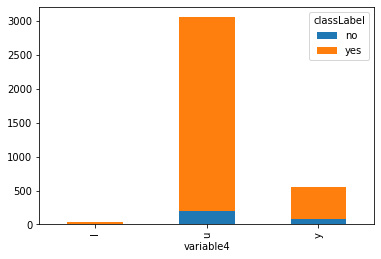

In [9]:
visualize(['variable4', 'classLabel'])

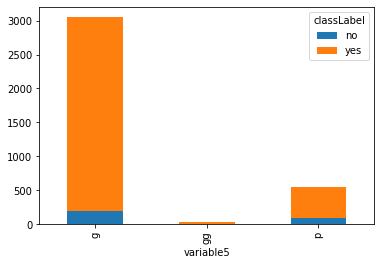

In [10]:
visualize(['variable5', 'classLabel'])

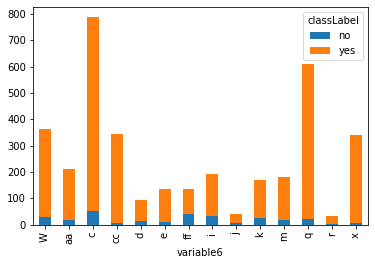

In [11]:
visualize(['variable6', 'classLabel'])

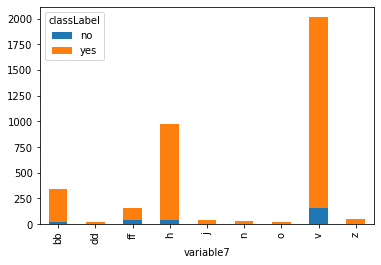

In [12]:
visualize(['variable7', 'classLabel'])

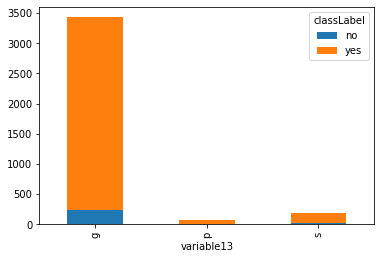

In [13]:
visualize(['variable13', 'classLabel'])

**Key Findings of data discovery section:**
  - Data is imbalanced, use SMOTE or direct oversampling
  - Variable17 is mostly NaN. So, drop it
  - Variable4 and Variable5 are identical so we will drop one of them
  - Drop Variable18. strongly correlated
  - Drop NaNs, as they number is so little after removing variable17
  - Drop variable2, variable15, variable16


**2- Data cleaning and preparation**

In [46]:
# weakly correlated
data = data.drop(['variable2'], axis=1)
data = data.drop(['variable15'], axis=1)
data = data.drop(['variable16'], axis=1)
# repeated, identical to variable4
data = data.drop(['variable5'], axis=1)
# Mostly NaNs, very limited information gain
data = data.drop(['variable17'], axis=1)
# perfectly correltated with classLabel, will be misleading and will cause overfit
data = data.drop(['variable18'], axis=1)
# Drop NaNs
data = data.dropna()

In [ ]:
data

,variable1,variable2,variable3,variable4,variable6,variable7,variable8,variable9,variable10,variable11,variable12,variable13,variable14,variable15,variable16,classLabel
0,a,1792.0,0.00054,u,c,v,175,f,t,1,t,g,80.0,5,800000.0,no
1,b,1692.0,0.00335,y,k,v,29,f,f,0,f,s,200.0,0,2000000.0,no
2,b,3125.0,1125.00000,u,ff,ff,0,f,t,1,f,g,96.0,19,960000.0,no
3,a,4817.0,1335.00000,u,i,o,335,f,f,0,f,g,0.0,120,0.0,no
4,b,3233.0,35.00000,u,k,v,5,f,f,0,t,g,232.0,0,2320000.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3694,b,255.0,0.00375,u,m,v,25,t,t,3,f,g,260.0,15108,2600000.0,yes
3696,a,235.0,0.00090,u,q,v,85,t,t,5,t,g,120.0,0,1200000.0,yes
3697,b,3417.0,917.00000,u,c,v,45,t,t,12,t,g,0.0,221,0.0,yes
3698,b,2783.0,154.00000,u,W,v,375,t,t,5,t,g,100.0,3,1000000.0,yes


In [47]:
# Overcome imbalanced data using SMOTE
from imblearn.over_sampling import SMOTENC
Categoricals = [0, 2, 3, 4, 6, 7, 9, 10]
# Categoricals = [0, 3, 4, 5, 7, 8, 10, 11]

X = data.drop(['classLabel'],axis=1)
y = data['classLabel']

sm = SMOTENC(categorical_features = Categoricals, sampling_strategy='auto', k_neighbors=2, random_state=100)
X_train_balanced, y_train_balanced = sm.fit_resample(X, y)

# convert data back to dataframe
import numpy as np
columnsNamesArr = data.columns.values
names = columnsNamesArr
names = np.delete(columnsNamesArr, [12])

X_train_balanced = pd.DataFrame(X_train_balanced, columns=names) 
y_train_balanced = pd.DataFrame(y_train_balanced, columns=['classLabel']) 
X_train_balanced

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


,variable1,variable3,variable4,variable6,variable7,variable8,variable9,variable10,variable11,variable12,variable13,variable14
0,a,0.00054,u,c,v,175,f,t,1,t,g,80
1,b,0.00335,y,k,v,29,f,f,0,f,s,200
2,b,1125,u,ff,ff,0,f,t,1,f,g,96
3,a,1335,u,i,o,335,f,f,0,f,g,0
4,b,35,u,k,v,5,f,f,0,t,g,232
...,...,...,...,...,...,...,...,...,...,...,...,...
6587,b,14.2301,y,W,v,6.39066,f,f,0,f,g,0
6588,b,81.0987,u,d,v,72.1161,f,f,0,f,g,63.4606
6589,b,5.736,y,W,v,23.0372,f,f,0,f,g,200
6590,b,3162.02,u,W,v,159.039,f,t,0.07451,t,g,148.078


In [48]:
# Encode categorical variables

# Binary variables encoding
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
X_train_balanced['variable1'] = labelencoder.fit_transform(X_train_balanced['variable1'])
X_train_balanced['variable9'] = labelencoder.fit_transform(X_train_balanced['variable9'])
X_train_balanced['variable10'] = labelencoder.fit_transform(X_train_balanced['variable10'])
X_train_balanced['variable12'] = labelencoder.fit_transform(X_train_balanced['variable12'])
y_train_balanced['classLabel'] = labelencoder.fit_transform(y_train_balanced['classLabel'])

# Rest nomial variables encoding
from sklearn.preprocessing import OneHotEncoder

Nomials = ['variable4', 'variable6', 'variable7', 'variable13']
X_train_balanced = pd.get_dummies(X_train_balanced, columns=Nomials, prefix=Nomials)

X_train_balanced

,variable1,variable3,variable8,variable9,variable10,variable11,variable12,variable14,variable4_l,variable4_u,variable4_y,variable6_W,variable6_aa,variable6_c,variable6_cc,variable6_d,variable6_e,variable6_ff,variable6_i,variable6_j,variable6_k,variable6_m,variable6_q,variable6_r,variable6_x,variable7_bb,variable7_dd,variable7_ff,variable7_h,variable7_j,variable7_n,variable7_o,variable7_v,variable7_z,variable13_g,variable13_p,variable13_s
0,0,0.00054,175,0,1,1,1,80,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
1,1,0.00335,29,0,0,0,0,200,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
2,1,1125,0,0,1,1,0,96,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
3,0,1335,335,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
4,1,35,5,0,0,0,1,232,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6587,1,14.2301,6.39066,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
6588,1,81.0987,72.1161,0,0,0,0,63.4606,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
6589,1,5.736,23.0372,0,0,0,0,200,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
6590,1,3162.02,159.039,0,1,0.07451,1,148.078,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0


**3- Model building**

In [49]:
# These are not found in validation set. so, to avoid error we will drop them
lst = ['variable4_l', 'variable7_o', 'variable13_p', 'variable6_r']
X_train_balanced = X_train_balanced.drop(lst, axis=1)

X_train_balanced['variable3'] = pd.to_numeric(X_train_balanced['variable3'])
X_train_balanced['variable8'] = pd.to_numeric(X_train_balanced['variable8'])
X_train_balanced['variable11'] = pd.to_numeric(X_train_balanced['variable11'])
X_train_balanced['variable14'] = pd.to_numeric(X_train_balanced['variable14'])


In [50]:
# Normalize variables
from sklearn.preprocessing import MinMaxScaler

# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler() # default=(0, 1)
numerical = ['variable3', 'variable8', 'variable14']

features_log_minmax_transform = pd.DataFrame(data = X_train_balanced)
features_log_minmax_transform[numerical] = scaler.fit_transform(X_train_balanced[numerical])
X_train_balanced = features_log_minmax_transform


Train the model

In [51]:
from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(X_train_balanced, y_train_balanced)
print(model)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)


**4- Model evaluation**

In [52]:
# validation set loading
data_validation = restructure_and_load_data(src='Binary-Classification/dataset/validation.csv')

# validation set cleaning and preparation
# Drop variables that are not used
data_validation = data_validation.drop(['variable2'], axis=1)
data_validation = data_validation.drop(['variable5'], axis=1)
data_validation = data_validation.drop(['variable15'], axis=1)
data_validation = data_validation.drop(['variable16'], axis=1)
data_validation = data_validation.drop(['variable17'], axis=1)
data_validation = data_validation.drop(['variable18'], axis=1)
# Drop NaNs
data_validation = data_validation.dropna()

# Split data to classLabel and independent variables 
X_test = data_validation.drop(['classLabel'],axis=1)
y_test = data_validation['classLabel']
y_test = pd.DataFrame(y_test, columns=['classLabel']) 

# Binary variables encoding
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
X_test['variable1'] = labelencoder.fit_transform(X_test['variable1'])
X_test['variable9'] = labelencoder.fit_transform(X_test['variable9'])
X_test['variable10'] = labelencoder.fit_transform(X_test['variable10'])
X_test['variable12'] = labelencoder.fit_transform(X_test['variable12'])
y_test['classLabel'] = labelencoder.fit_transform(y_test['classLabel'])

# Rest nomial variables encoding
from sklearn.preprocessing import OneHotEncoder

Nomials = ['variable4', 'variable6', 'variable7', 'variable13']
X_test = pd.get_dummies(X_test, columns=Nomials, prefix=Nomials)

In [53]:
# Normalize variables
from sklearn.preprocessing import MinMaxScaler

# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler() # default=(0, 1)
numerical = ['variable3', 'variable8', 'variable14']

features_log_minmax_transform = pd.DataFrame(data = X_test)
features_log_minmax_transform[numerical] = scaler.fit_transform(X_test[numerical])
X_test = features_log_minmax_transform

In [54]:
# predict the class of validation set data
y_pred = model.predict(X_test)

In [55]:
# Results
from sklearn.metrics import accuracy_score,roc_auc_score, average_precision_score, recall_score, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

auc = roc_auc_score(y_test, y_pred)
print("AUC: " , auc)

precision = average_precision_score(y_test, y_pred)
print("Precision: " , precision)

recall = recall_score(y_test, y_pred)
print("Recall: " , recall)

cm = confusion_matrix(y_test, y_pred)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print("Confusion matrix diagonals: " , cm.diagonal())

Accuracy: 87.11%
AUC:  0.8747868712702472
Precision:  0.7946679541046511
Recall:  0.9456521739130435
Confusion matrix diagonals:  [0.80392157 0.94565217]


In [ ]:
# Saving the model
import pickle 
  
filename = 'finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))  

# load the model
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.8711340206185567


**Logistic Regression - try**

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

# Fit logreg to the train set
logreg.fit(X_train_balanced,y_train_balanced)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred = logreg.predict(X_test)

In [ ]:
# Results
from sklearn.metrics import accuracy_score,roc_auc_score, average_precision_score, recall_score, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

auc = roc_auc_score(y_test, y_pred)
print("AUC: " , auc)

precision = average_precision_score(y_test, y_pred)
print("Precision: " , precision)

recall = recall_score(y_test, y_pred)
print("Recall: " , recall)

cm = confusion_matrix(y_test, y_pred)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print("Confusion matrix: " , cm.diagonal())

Accuracy: 81.96%
AUC:  0.8252344416027281
Precision:  0.7299826554674255
Recall:  0.9347826086956522
Confusion matrix:  [0.71568627 0.93478261]
